## The Most Appropriate Agricultural Product Recommendation Model For Farmers
<br>ICFA has compiled this dataset, which contains information on India's rainfall, relative humidity, temperature, and soil composition. We will use this data to develop a system that utilizes the best-growing conditions for specific crops, with the most suitable of the three machine learning models we have created. This system will provide farmers with recommendations for agricultural products based on the data from their land.
<br>
<br>
<br>N - Ratio of Nitrogen content in soil
<br>P - Ratio of Phosphorous content in soil
<br>K - Ratio of Potassium content in soil
<br>temperature - Temperature in degree Celsius
<br>humidity - Relative humidity in %
<br>ph - PH value of the soil
<br>rainfall - Rainfall in mm
<br>
<br>
<br>Dataset link:
<br>https://www.kaggle.com/datasets/siddharthss/crop-recommendation-dataset


Let's add the libraries for our study and load our data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Write this code not to show warnings:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_croprec = pd.read_csv("crop_recommendation.csv")
df_croprec.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [4]:
df_croprec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df_croprec.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
len(df_croprec.label.unique())

22

In [7]:
df_croprec.value_counts("label")

label
apple          100
banana         100
rice           100
pomegranate    100
pigeonpeas     100
papaya         100
orange         100
muskmelon      100
mungbean       100
mothbeans      100
mango          100
maize          100
lentil         100
kidneybeans    100
jute           100
grapes         100
cotton         100
coffee         100
coconut        100
chickpea       100
blackgram      100
watermelon     100
dtype: int64

In [8]:
df_croprec.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


We see no outliers or null values when we examine the data set. The dataset has been preprocessed, so no cleaning process is needed. We can see that there are 22 different types of crops for which data has been collected, with 100 pieces of information obtained for each.

To visualize, let's get the average information of each product.

In [9]:
df_label = df_croprec.groupby("label").mean().reset_index()
df_label

,label,N,P,K,temperature,humidity,ph,rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
5,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
6,cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
7,grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
8,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
9,kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778


Text(0.5, 0, '')

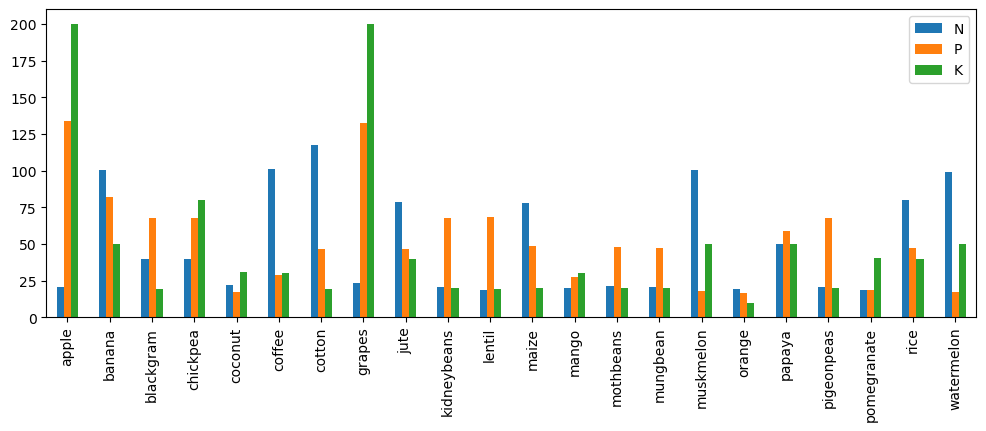

In [10]:
df_label.plot(x="label", y=["N","P","K"], kind="bar",figsize=(12,4)).get_figure().gca().set_xlabel("")

When we examine the N, P, K data, the values of the pairs muskmelon-watermelon, mothbeans-mungbean, grapes-apple, jute-rice, and the trio kidneybeans-lentil-pigeonpeas seem very close to each other. Let's check out their other info graphics.

Text(0.5, 0, '')

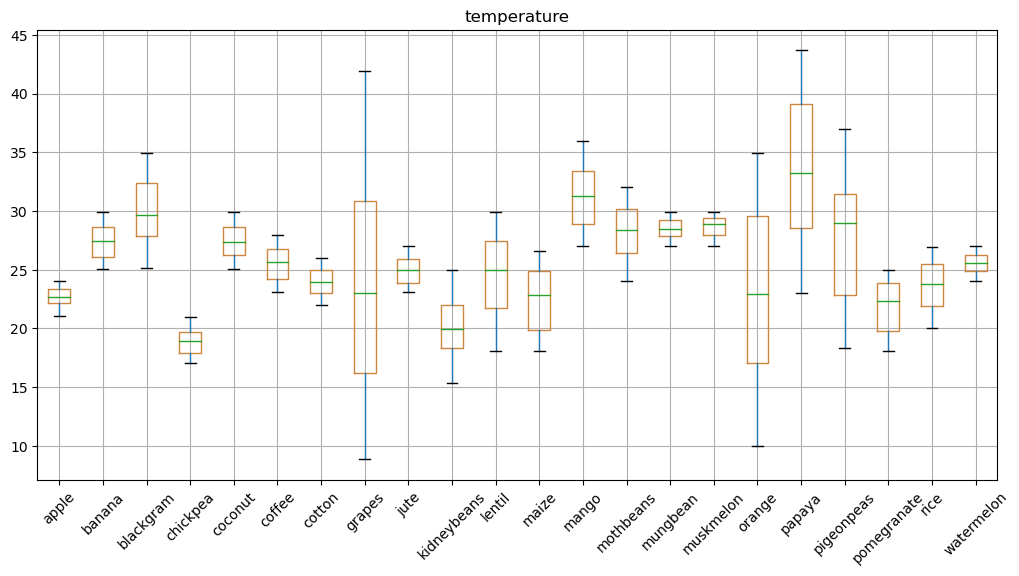

In [11]:
df_croprec.boxplot(column="temperature",by="label",rot=45,figsize=(12,6),boxprops=dict(color="peru")).get_figure().suptitle("").get_figure().gca().set_xlabel("")

Text(0.5, 0, '')

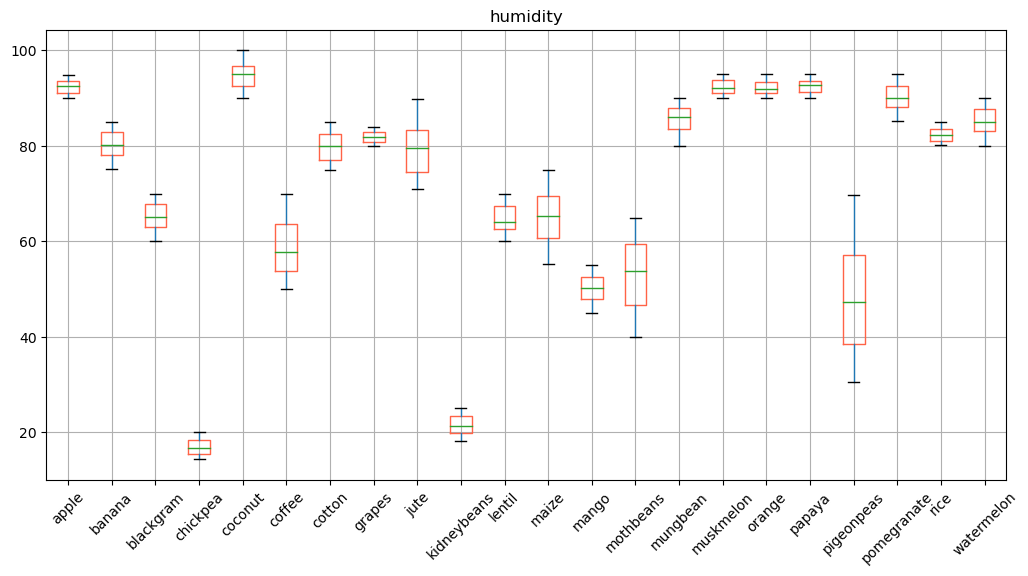

In [12]:
df_croprec.boxplot(column="humidity",by="label",rot=45,figsize=(12,6),boxprops=dict(color="tomato")).get_figure().suptitle("").get_figure().gca().set_xlabel("")

Text(0.5, 0, '')

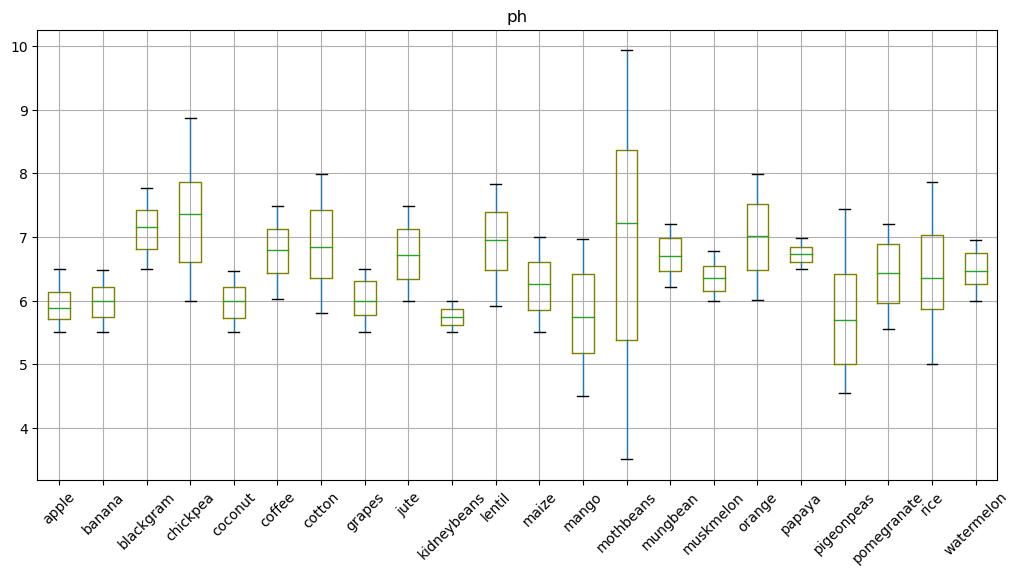

In [13]:
df_croprec.boxplot(column="ph",by="label",rot=45,figsize=(12,6),boxprops=dict(color="olive")).get_figure().suptitle("").get_figure().gca().set_xlabel("")

Text(0.5, 0, '')

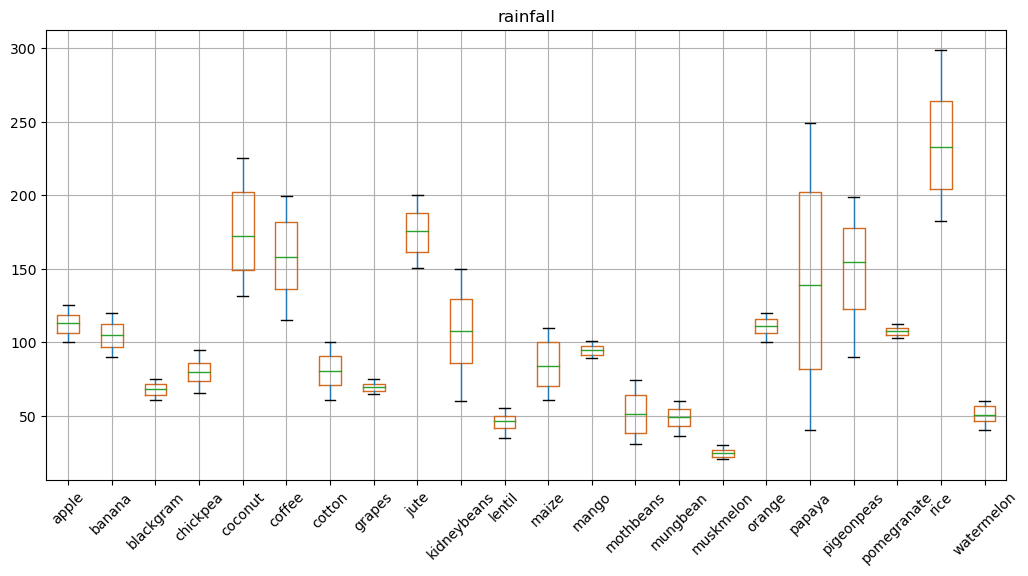

In [14]:
df_croprec.boxplot(column="rainfall",by="label",rot=45,figsize=(12,6),boxprops=dict(color="chocolate")).get_figure().suptitle("").get_figure().gca().set_xlabel("")

We have examined the temperature, humidity, rainfall, and pH information together for muskmelon-watermelon, mothbeans-mungbean, grapes-apple, jute-rice, kidneybeans-lentil-pigeonpeas. We've compared and checked the differences between these crop pairs based on these environmental factors.
<br>
<br>Especially the rainfall requirements are different in the muskmelon-watermelon couple.
<br>
<br>Rainfall requirements are different in the mothbeans-mungbean pair. While 'mothbeans' can grow at a wider pH value, 'mungbean' has a more limited pH requirement.
<br>
<br>Humidity and rainfall requirements are different in the grapes-apple pair.
<br>
<br>In the kidneybeans-lentil-pigeonpeas trio, humidity is different between kidneybean-pigeonpeas and rainfall is different between lentil-pigeonpeas and lentil-kidneybean.
<br>
<br>In the jute-rice pair, the values are similar in all variables.
<br>
<br>When we look at the N, P, K values, we see that crop pairs with very similar growing environments have differences in values such as rainfall and humidity. This tells us that our models can work correctly. We see that only the jute-rice pair has similarities in all their growing environment values, and this may cause low model accuracy in this crop pair.

## Model Selection
<br> We will try 3 models: SVC, KNN and Random Forest.

Let's split the data into training and test groups and set the separation rate of the test group to 0.25.

In [15]:
X=df_croprec.iloc[:,0:7]; X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [16]:
y=df_croprec.iloc[:,7];y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [18]:
len(X_train)

1650

In [19]:
len(X_test)

550

Since the measured values are in numerically different ranges, we need to scale them. Let's use MinMaxScaler.

In [20]:
scaler=MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train

array([[0.07142857, 0.85714286, 0.955     , ..., 0.88395441, 0.34614121,
        0.33360134],
       [0.21428571, 0.46428571, 0.37      , ..., 0.06646368, 0.59225031,
        0.1775945 ],
       [0.15      , 0.41428571, 0.06      , ..., 0.62890018, 0.47508068,
        0.07632005],
       ...,
       [0.37142857, 0.45      , 0.365     , ..., 0.03135538, 0.5274683 ,
        0.23653596],
       [0.2       , 0.38571429, 0.085     , ..., 0.44949809, 0.55161389,
        0.54169692],
       [0.03571429, 0.40714286, 0.09      , ..., 0.60882214, 0.1893322 ,
        0.44965737]])

In [22]:
X_test

array([[0.14285714, 0.28571429, 0.055     , ..., 0.47072122, 0.17440142,
        0.09062524],
       [0.42857143, 0.22142857, 0.19      , ..., 0.80260119, 0.27703851,
        0.71742192],
       [0.22142857, 0.36428571, 0.09      , ..., 0.24643106, 0.33545265,
        0.55455998],
       ...,
       [0.54285714, 0.3       , 0.185     , ..., 0.8052619 , 0.34748136,
        0.8745355 ],
       [0.06428571, 0.38571429, 0.095     , ..., 0.29284398, 0.19324024,
        0.42039584],
       [0.25      , 0.37857143, 0.075     , ..., 0.57408641, 0.35098467,
        0.2509188 ]])

### SVM

Let's apply the SVM model using the SVC method.

In [23]:
cls=svm.SVC()

In [24]:
cls.fit(X_train,y_train)

SVC()

Let's check the scores.

In [25]:
cls.score(X_test,y_test)

0.9818181818181818

In [26]:
kf1=KFold(n_splits=5,shuffle=True)
scoreSVM=cross_val_score(cls, X, y, cv=kf1);scoreSVM

array([0.97727273, 0.99090909, 0.96818182, 0.98409091, 0.975     ])

Let's examine the results of the Classification Report and Confusion Matrix to see the success of the model in predicting all classes in detail.

In [27]:
predictions_cls=cls.predict(X_test)
print(classification_report(y_test,predictions_cls))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       1.00      1.00      1.00        25
   blackgram       0.94      0.91      0.93        34
    chickpea       1.00      1.00      1.00        25
     coconut       1.00      1.00      1.00        12
      coffee       1.00      1.00      1.00        31
      cotton       0.92      1.00      0.96        24
      grapes       1.00      1.00      1.00        21
        jute       0.91      1.00      0.95        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       0.88      0.96      0.92        24
       maize       1.00      0.93      0.96        28
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        29
      orange       1.00      1.00      1.00        30
      papaya       1.00    

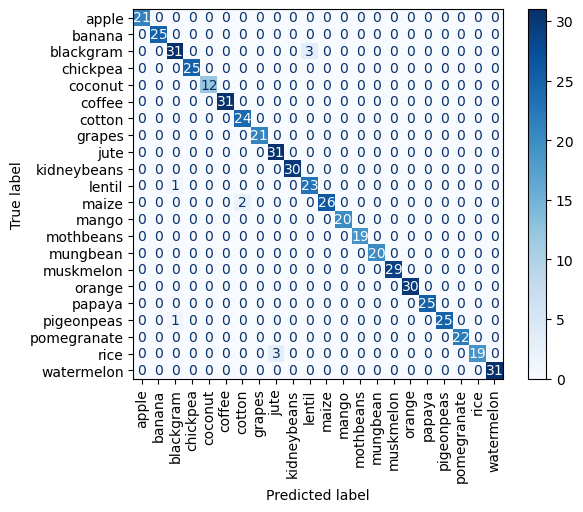

In [28]:
cmSVM = confusion_matrix(y_test, predictions_cls, labels=cls.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cmSVM, display_labels=cls.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation="vertical")
plt.show()

### KNN

In [29]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [30]:
knn.score(X_test,y_test)

0.98

In [31]:
kf3=KFold(n_splits=5,shuffle=True)
scoreKNN=cross_val_score(knn, X, y, cv=kf3);scoreKNN

array([0.97272727, 0.97954545, 0.98409091, 0.98863636, 0.975     ])

In [32]:
predictions_knn=knn.predict(X_test)
print(classification_report(y_test,predictions_knn))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       1.00      1.00      1.00        25
   blackgram       0.91      0.94      0.93        34
    chickpea       1.00      1.00      1.00        25
     coconut       1.00      1.00      1.00        12
      coffee       1.00      1.00      1.00        31
      cotton       0.92      1.00      0.96        24
      grapes       1.00      1.00      1.00        21
        jute       0.94      0.97      0.95        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       0.92      0.92      0.92        24
       maize       1.00      0.93      0.96        28
       mango       0.95      1.00      0.98        20
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        29
      orange       1.00      1.00      1.00        30
      papaya       1.00    

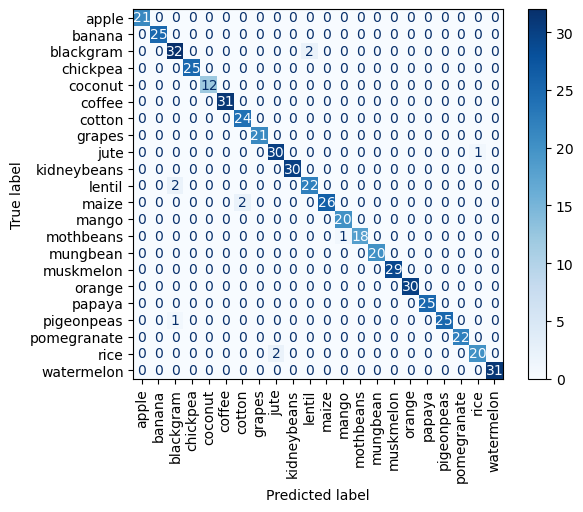

In [33]:
cmKNN = confusion_matrix(y_test, predictions_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cmKNN, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation="vertical")
plt.show()

### Random Forest

In [34]:
clr=RandomForestClassifier()
clr.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
clr.score(X_test,y_test)

0.9927272727272727

In [36]:
kf2=KFold(n_splits=5,shuffle=True)
scoreRF=cross_val_score(clr, X, y, cv=kf2);scoreRF

array([0.99772727, 0.99318182, 0.99318182, 0.98863636, 0.99772727])

In [37]:
predictions_clr=clr.predict(X_test)
print(classification_report(y_test,predictions_clr))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       1.00      1.00      1.00        25
   blackgram       1.00      0.97      0.99        34
    chickpea       1.00      1.00      1.00        25
     coconut       1.00      1.00      1.00        12
      coffee       1.00      1.00      1.00        31
      cotton       0.96      1.00      0.98        24
      grapes       1.00      1.00      1.00        21
        jute       0.97      0.97      0.97        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        24
       maize       0.96      0.96      0.96        28
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        29
      orange       1.00      1.00      1.00        30
      papaya       1.00    

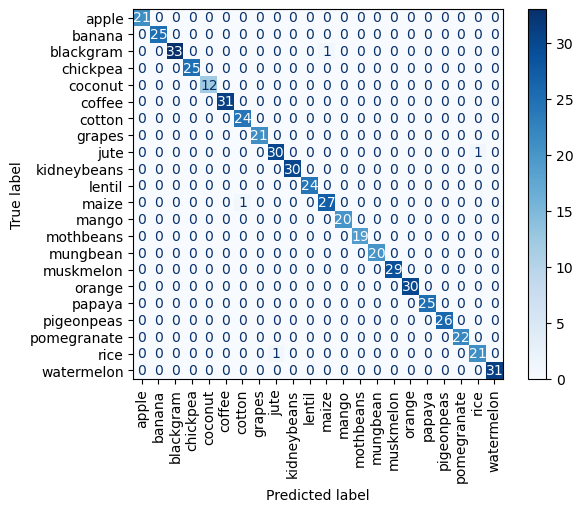

In [38]:
cmRF = confusion_matrix(y_test, predictions_clr, labels=clr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cmRF, display_labels=clr.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation="vertical")
plt.show()

## Conclusion
When we analyze the scores, the Random Forest model is the best among the others. Our model is very good at recommending high yielding crops for given environments.